In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ads_dimension = pd.read_excel("Dataset.xlsx",sheet_name='ads dimension (dim table)',header=1)
mod_dim = pd.read_excel("Dataset.xlsx",sheet_name='moderator dimension (dim table)',header=0)

#test


### Check Data of Ads Dimension


In [3]:
print(ads_dimension.shape)


(40679, 12)


# Ads Dimension


### Cleaning Punish_Num Column

In [4]:
# to find the distribution of latest_punish_begin_date for blank punish_num rows
condition = ads_dimension['punish_num'].isna()
filtered_df = ads_dimension[condition]
filtered_df.head()

unique_countss = filtered_df['latest_punish_begin_date'].value_counts()
print(unique_countss)

# all latest_punish_begin_date = 2000-01-01 if punish_num is blank, so we replace the blank with a 0
ads_dimension['punish_num'].fillna(0, inplace=True)
unique_counts = ads_dimension['punish_num'].value_counts()
print(unique_counts)

2000-01-01    38286
Name: latest_punish_begin_date, dtype: int64
0.0     38286
1.0      2194
2.0       163
4.0        14
3.0        13
16.0        5
12.0        2
5.0         2
Name: punish_num, dtype: int64


### Removing Duplicate Rows

In [5]:



# deleted all rows that are an exact duplicate(all columns same) of other rows.
len(ads_dimension)

duplicates = ads_dimension.duplicated()
# duplicates = ads_dimension.duplicated().sum()
duplicate_rows = ads_dimension[duplicates]
duplicate_rows


,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
119,20230807,1767389794976760,ID,ID,1.0,2023-05-10,7.7968,10.8649,2023-05-31 06:12:00,1.80,Auction Ads,auction_relation
141,20230807,1770618315063340,CA,USCA,1.0,2023-06-29,55.3400,51.0029,2023-07-05 22:41:00,1.78,Auction Ads,auction_relation
147,20230807,1770774645761070,US,USCA,1.0,2023-06-29,0.3800,51.0029,2023-07-07 16:04:00,1.78,Auction Ads,auction_relation
174,20230807,1770837186637870,ID,ID,1.0,2023-05-16,12.8547,8.2306,2023-07-08 07:35:00,1.80,Auction Ads,auction_relation
178,20230807,1771829420441650,MY,MY,1.0,2023-08-03,25.1724,18.4393,2023-07-19 06:29:00,2.31,Auction Ads,auction_relation
...,...,...,...,...,...,...,...,...,...,...,...,...
40324,20230807,1773576487869440,TR,NaN,0.0,2000-01-01,NaN,0.1207,NaT,0.54,Non-Auction Ads,Promote
40377,20230807,1773566740854850,TR,NaN,0.0,2000-01-01,NaN,0.1032,NaT,0.54,Non-Auction Ads,Promote
40624,20230807,1773596777307170,HU,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40626,20230807,1773601756737540,PL,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote


##### We have realised that there are quite a significant number of rows which are duplicated (all columns have the same data), and thus we proceed to remove these rows. 


In [6]:
ads_dimension_no_duplicates = ads_dimension.drop_duplicates()
print(ads_dimension_no_duplicates)
len(ads_dimension_no_duplicates)

# ads_dimension_no_duplicates.to_excel('no_dups_df.xlsx', index=False)


# rename 
ads_dim2 = ads_dimension_no_duplicates


         p_date             ad_id delivery_country queue_market  punish_num  \
0      20230807  1747578422390810               US         USCA         1.0   
1      20230807  1758543228094480               SA         MENA         1.0   
2      20230807  1738303151826990               AU           AU         2.0   
3      20230807  1738303920938010               NZ           NZ         2.0   
4      20230807  1738304016410620               NZ           NZ         2.0   
...         ...               ...              ...          ...         ...   
40673  20230807  1773517805189120               TR          NaN         0.0   
40674  20230807  1773472206047230               VN          NaN         0.0   
40675  20230807  1773607712030720               BR          NaN         0.0   
40676  20230807  1773589699308540               BE          NaN         0.0   
40678  20230807  1773608138524670               BR          NaN         0.0   

      latest_punish_begin_date  ad_revenue  avg_ad_

### Check for Null/Missing Values in Columns 

In [7]:
ads_dim2.head()
# finding the number of null/blank values for all columns in ads_dimension
for col in ads_dim2.columns:
    if ads_dim2[col].isna().sum() > 0:
        print(f' "{col}" : {ads_dim2[col].isna().sum()}')
    else:
        continue


 "queue_market" : 20959
 "ad_revenue" : 10495
 "start_time" : 6600


### Removing Queue Market Column


In [8]:
# Drop queue_market col as delivery_country is more specific than queue_market
ads_dim2 = ads_dim2.drop('queue_market', axis=1)
ads_dim2.head()

,p_date,ad_id,delivery_country,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
0,20230807,1747578422390810,US,1.0,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation
1,20230807,1758543228094480,SA,1.0,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged)
2,20230807,1738303151826990,AU,2.0,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation
3,20230807,1738303920938010,NZ,2.0,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
4,20230807,1738304016410620,NZ,2.0,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation


In [9]:
# Drop redundant cols
ads_dim2 = ads_dim2.drop('p_date', axis=1)

ads_dim2.head()

,ad_id,delivery_country,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
0,1747578422390810,US,1.0,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation
1,1758543228094480,SA,1.0,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged)
2,1738303151826990,AU,2.0,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation
3,1738303920938010,NZ,2.0,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
4,1738304016410620,NZ,2.0,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation


In [10]:
for col in ads_dimension_no_duplicates.columns:
    if ads_dimension_no_duplicates[col].isna().sum() > 0:
        print(f' "{col}" : {ads_dimension_no_duplicates[col].isna().sum()}')
    else:
        continue

null_rows = ads_dimension_no_duplicates[ads_dimension_no_duplicates[['start_time', 'ad_revenue']].isnull().all(axis=1)]
len(null_rows)

 "queue_market" : 20959
 "ad_revenue" : 10495
 "start_time" : 6600


6600

## Data Exploration

In [43]:
import pandas as pd

# Assuming you have already calculated and printed the descriptive statistics for each column
numerical_columns = ['punish_num', 'baseline_st', 'ad_revenue', 'avg_ad_revenue']

# Create a dictionary to store the statistics
statistics_dict = {}

# Loop through the numerical columns and store the statistics in the dictionary
for column in numerical_columns:
    statistics = ads_dim2[column].describe()
    statistics_dict[column] = statistics

# Create a DataFrame from the dictionary
statistics_df = pd.DataFrame(statistics_dict)

# Transpose the DataFrame for better readability
statistics_df = statistics_df.T

# Display the table of statistics
print(statistics_df)


                  count       mean         std   min     25%     50%    75%  \
punish_num      39564.0   0.067208    0.338988  0.00  0.0000  0.0000   0.00   
baseline_st     39564.0   1.197242    0.660816  0.54  0.5400  1.3600   1.78   
ad_revenue      29069.0  73.611591  493.263304  0.00  1.3724  5.8900  20.07   
avg_ad_revenue  39564.0  23.232728  188.340563  0.00  0.8219  2.5395   8.05   

                       max  
punish_num         16.0000  
baseline_st         7.5900  
ad_revenue      27100.6200  
avg_ad_revenue  17144.4986  


#### Histogram for Numerical Variables

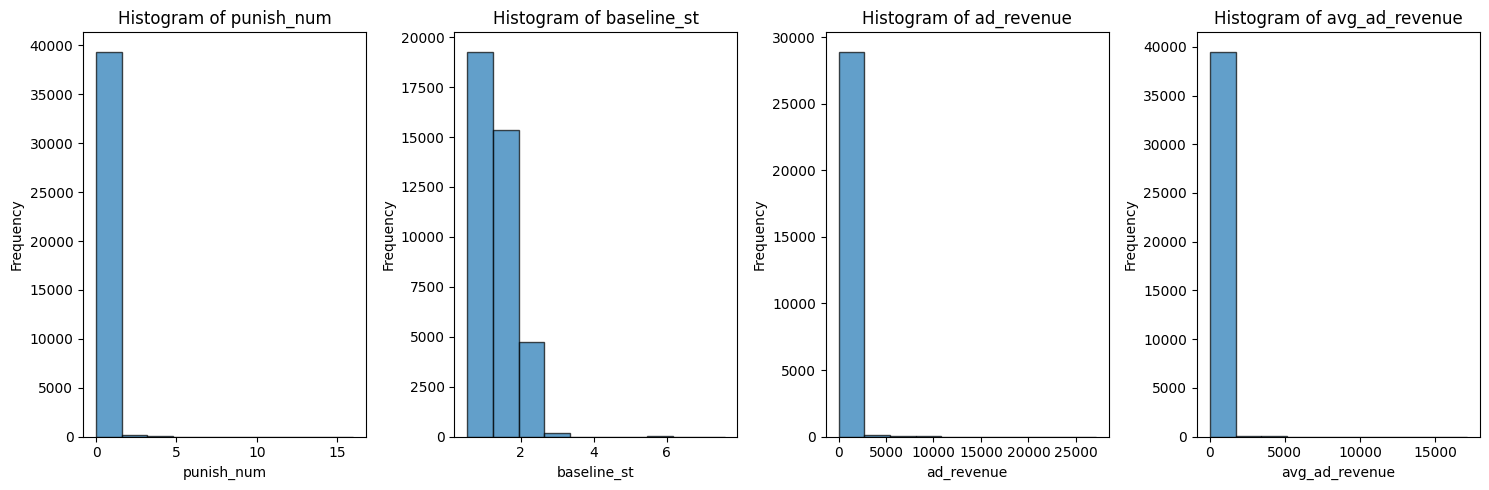

In [11]:
plt.figure(figsize=(15, 5))
numerical_columns = [ 'punish_num','baseline_st' ,'ad_revenue', 'avg_ad_revenue']

for i, column_name in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    plt.hist(ads_dim2[column_name], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


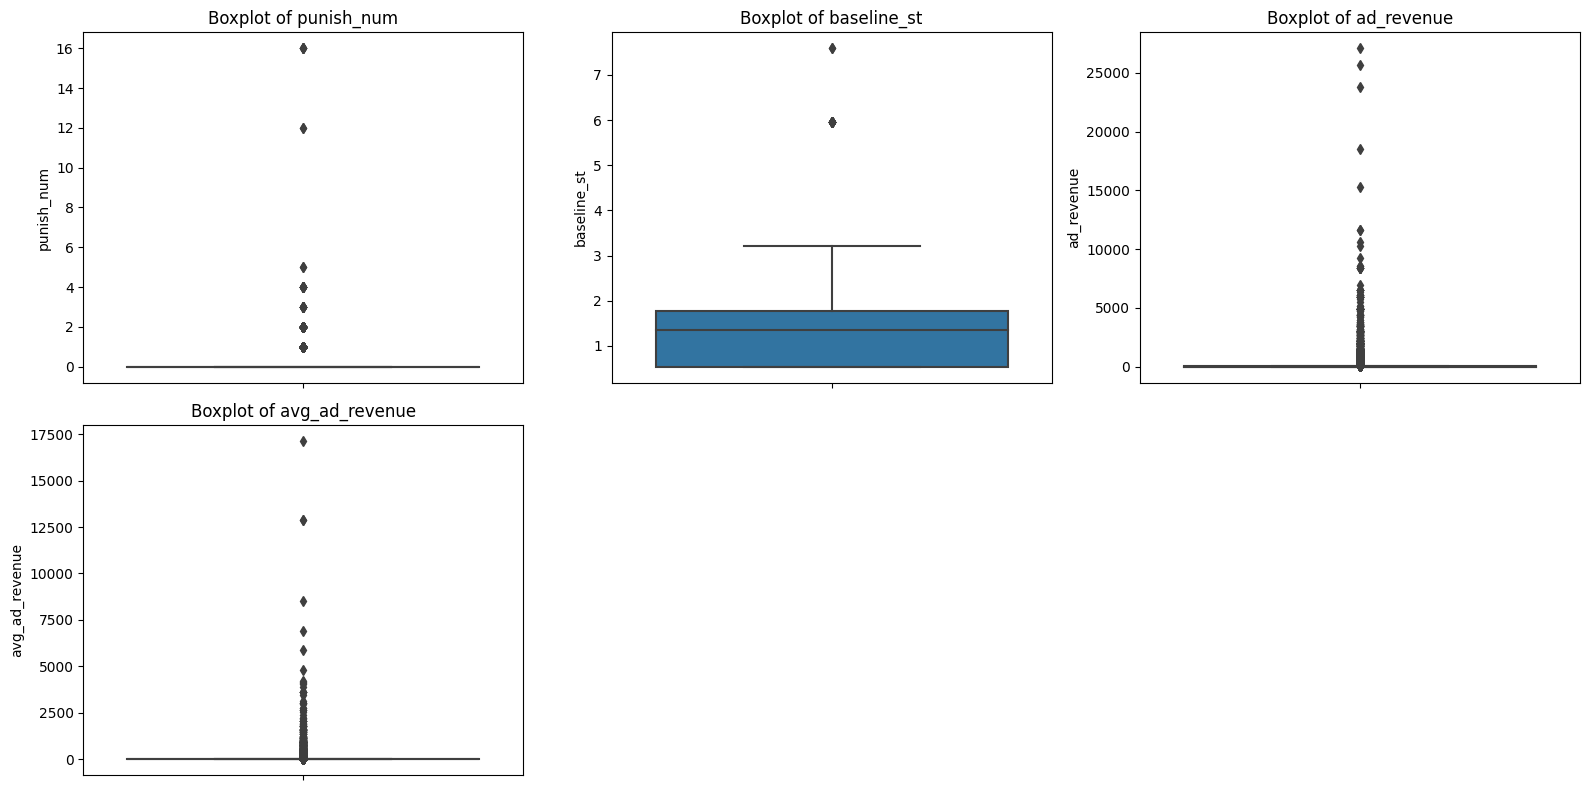

In [22]:
# Select numerical columns for outlier analysis
numerical_columns = [ 'punish_num','baseline_st' ,'ad_revenue', 'avg_ad_revenue']
# Create boxplots for each numerical column
plt.figure(figsize=(16, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=ads_dim2, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()




### Find the number of outliers per numerical column

In [35]:


punish_num_outliers = ads_dim2[ads_dim2['punish_num'] > 10]

print("The number of outliers for punish_num = ", len(punish_num_outliers))
print(punish_num_outliers["punish_num"])



baseline_st_outliers = ads_dim2[ads_dim2['baseline_st'] > 5]

print("The number of outliers for baseline_st = ", len(baseline_st_outliers))
print(punish_num_outliers["baseline_st"])








The number of outliers for punish_num =  7
10     16.0
11     16.0
12     16.0
15     16.0
16     16.0
508    12.0
531    12.0
Name: punish_num, dtype: float64
The number of outliers for baseline_st =  23
10     3.21
11     3.21
12     3.21
15     3.21
16     3.21
508    2.14
531    2.14
Name: baseline_st, dtype: float64


In [44]:
ad_rev_outliers = ads_dim2[ads_dim2['ad_revenue'] > 20000]

print("The number of outliers for ad_rev = ", len(ad_rev_outliers))
print(punish_num_outliers["ad_revenue"])

avg_ad_revenue_outliers = ads_dim2[ads_dim2['avg_ad_revenue'] > 10000]

print("The number of outliers for avg_ad_revenue = ", len(avg_ad_revenue_outliers))
print(punish_num_outliers["avg_ad_revenue"])

The number of outliers for ad_rev =  3
10     517.5400
11     530.7100
12       0.0000
15     547.4000
16     528.1400
508         NaN
531      1.1753
Name: ad_revenue, dtype: float64
The number of outliers for avg_ad_revenue =  3
10     23.7129
11     23.7129
12     23.7129
15     23.7129
16     23.7129
508     2.4270
531     2.4270
Name: avg_ad_revenue, dtype: float64


In [14]:
# ad revenue that is null 
blank_ad_revenue_condition = ads_dimension_no_duplicates['ad_revenue'].isna()
filtered_df_ads = ads_dimension_no_duplicates[blank_ad_revenue_condition]
filtered_df_ads


,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
3,20230807,1738303920938010,NZ,NZ,2.0,2023-07-24,NaN,5.3650,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
262,20230807,1772998101648410,VN,VN,3.0,2023-08-02,NaN,2.9423,2023-08-01 03:56:00,2.13,RIE,Ad Group Recall (Merged)
288,20230807,1773112965960700,US,USCA,2.0,2023-08-07,NaN,9.9047,2023-08-02 10:28:00,1.78,Auction Ads,auction_relation
411,20230807,1773231382949920,BR,BR,1.0,2023-08-07,NaN,0.4337,2023-08-04 10:00:00,1.70,RIE,Ad Group Recall (Merged)
426,20230807,1773312757473310,FR,FR,1.0,2023-07-27,NaN,2.7379,2023-08-04 16:23:00,1.97,Auction Ads,auction_relation
...,...,...,...,...,...,...,...,...,...,...,...,...
40673,20230807,1773517805189120,TR,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40674,20230807,1773472206047230,VN,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40675,20230807,1773607712030720,BR,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote
40676,20230807,1773589699308540,BE,NaN,0.0,2000-01-01,NaN,0.0000,NaT,0.54,Non-Auction Ads,Promote


### Non Duplicated AD_ID

In [15]:
# check for non duplicated ad_id
ad_id_counts = filtered_df_ads['ad_id'].value_counts()
non_duplicated_ad_ids = ad_id_counts[ad_id_counts == 1].index
non_duplicated_ad_ids

Int64Index([1773528586443780, 1773472041808890, 1773485138420730,
            1773536852600830, 1773530064765950, 1773573053515780,
            1773521721975810, 1773567323185150, 1773546321704960,
            1773546245980160,
            ...
            1773607685605410, 1773603807255580, 1773606864464940,
            1773606537550840, 1773586437829630, 1773586243261530,
            1773608691356680, 1773555425789970, 1773549770898450,
            1773608138524670],
           dtype='int64', length=9977)

#### For non duplicated ad_ids, there is only one row per ad, and thus we will choose to directly take the average_ad_revenue as the ad_revenue for the said ad

### Dupilcated AD_ID (I.e. there are several rows with the same AD_ID)

In [16]:

# look at the rows where ad_id is duplicated 
unique_values = filtered_df_ads['ad_id'].duplicated()
duplicate_rows = filtered_df_ads[unique_values]

unique_revenue_counts = filtered_df_ads.groupby('ad_id')['avg_ad_revenue'].nunique()
len(unique_revenue_counts)

#10133


num_rows_with_unique_counts_1 = (unique_revenue_counts == 1).sum()
num_rows_with_unique_counts_1

#10132 rows with unique counts --> suggesting that all the rows have the same average_revenue --> thus we can take it as this particular ad has ad_revenue = avg_ad_revenue

10132

In [17]:

non_unique_ad_ids = unique_revenue_counts[unique_revenue_counts != 1].index
non_unique_ad_ids

# there is one ad_id 1773587205890050, which has a different avg_ad_rev, in this case, we can take it the ad_revenue for the respective country to be the indicated avg_ad_revenue. 

Int64Index([1773587205890050], dtype='int64', name='ad_id')

####All in all, 

## Moderator Dimension

In [18]:
# find number of null values in each column

for col in mod_dim.columns:
    if mod_dim[col].isna().sum() > 0:
        print(f' "{col}" : {mod_dim[col].isna().sum()}')
    else:
        continue

# accuracy colum contains "-" values
non_numeric_values = mod_dim[pd.to_numeric(mod_dim[" accuracy "], errors='coerce').isna()]
len(non_numeric_values)

print(non_numeric_values)

 "Productivity" : 129
 "Utilisation %" : 129
             moderator                                             market  \
0     1689841547143170  ["SA", "OM", "BH", "QA", "JO", "IQ", "KW", "EG...   
265   1694555598292994                                             ["NL"]   
412   1761892264652818                                             ["DE"]   
510            1005827                                             ["BR"]   
529            2796851                                             ["KZ"]   
892            3778633                                             ["TR"]   
916            5581253                                             ["DK"]   
943            9699751                                             ["ID"]   
1283           1822136                                       ["GB", "IE"]   
1331           3297271                                          ["OTHER"]   
1393  1695027913818113                                             ["IT"]   

      Productivity  Utilisatio

In [19]:
# remove rows that have null values for productivity and utilisation, and "-" values for accuracy
column_name = ' accuracy '
numeric_mask = pd.to_numeric(mod_dim[column_name], errors='coerce').notna()
cleaned_mod_dim = mod_dim[numeric_mask]

len(cleaned_mod_dim)

columns_to_check = ['Productivity', 'Utilisation %']

cleaned_mod_dim = cleaned_mod_dim.dropna(subset=columns_to_check, how='all')

len(cleaned_mod_dim)


1275

In [20]:
print(mod_dim.columns)

Index(['moderator', 'market', 'Productivity', 'Utilisation %', 'handling time',
       ' accuracy '],
      dtype='object')
